# Compare Flights example

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
%matplotlib inline

## Importing libraries

In [3]:
from rocketpy.plots.compare import CompareFlights
from rocketpy import Environment, Flight, Rocket, SolidMotor
from datetime import datetime, timedelta


## Creating the Flight objects

First, let's create the environment, motor and rocket objects.

In [4]:
after_tomorrow = datetime.now() + timedelta(days=2)
env = Environment(railLength=5, latitude=-23, longitude=-49, date=after_tomorrow)
env.setAtmosphericModel(type="Forecast", file="GFS")

Pro75M1670 = SolidMotor(
    thrustSource="../../data/motors/Cesaroni_M1670.eng",
    burnOut=3.9,
    grainNumber=5,
    grainSeparation=5 / 1000,
    grainDensity=1815,
    grainOuterRadius=33 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=120 / 1000,
    nozzleRadius=33 / 1000,
    throatRadius=11 / 1000,
    interpolationMethod="linear",
)

Calisto = Rocket(
    motor=Pro75M1670,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag="../../data/calisto/powerOffDragCurve.csv",
    powerOnDrag="../../data/calisto/powerOnDragCurve.csv",
)

Calisto.setRailButtons([0.2, -0.5])

NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addTrapezoidalFins(
    n=4,
    rootChord=0.120,
    tipChord=0.040,
    span=0.100,
    distanceToCM=-1.04956,
    cantAngle=0,
    radius=None,
    airfoil=None,
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 + 1400 m (+1400 due to surface elevation).
    return True if y[5] < 0 and y[2] < 800 + 1400 else False


Main = Calisto.addParachute(
    "Main",
    CdS=10.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Calisto.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)


c:\users\guiga\documents\github-vscode\rocketpy\rocketpy\Environment.py:1994: UserWarning: Exact chosen launch time is not available in the provided file, using 2023-01-06 00:00:00 UTC instead.
  warnings.warn(


Now we can create different flights varying the launch angle and the rail 
inclination:

In [5]:
inclinations = [85, 75, 60]
headings = [90, 135]
flights = []

for heading in headings:
    for inclination in inclinations:
        flight = Flight(
            environment=env,
            rocket=Calisto,
            inclination=inclination,
            heading=heading,
            name=f"Incl {inclination} Head {heading}",
        )
        flights.append(flight)


In [6]:
print("Number of flights: ", len(flights))


Number of flights:  6


## Start the comparison

In [7]:
comparison = CompareFlights(flights)


### Linear Kinematics

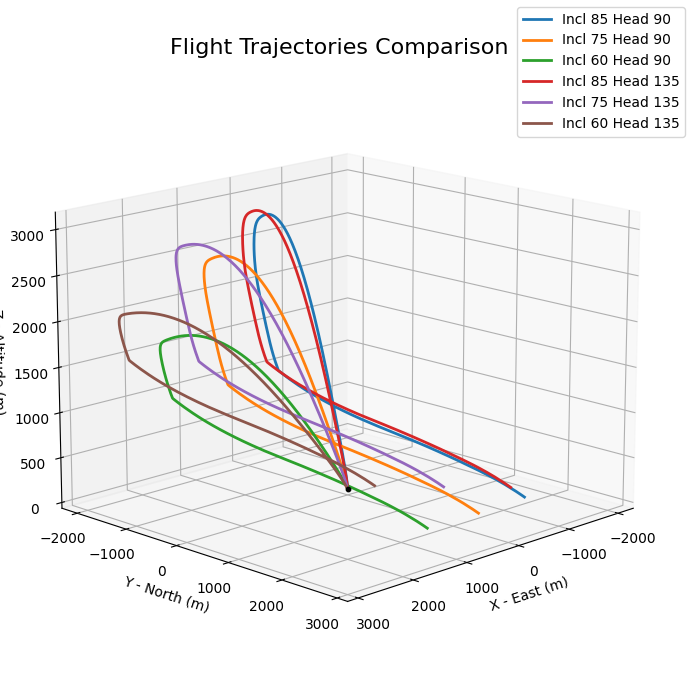

In [8]:
comparison.trajectories_3d(legend=True)


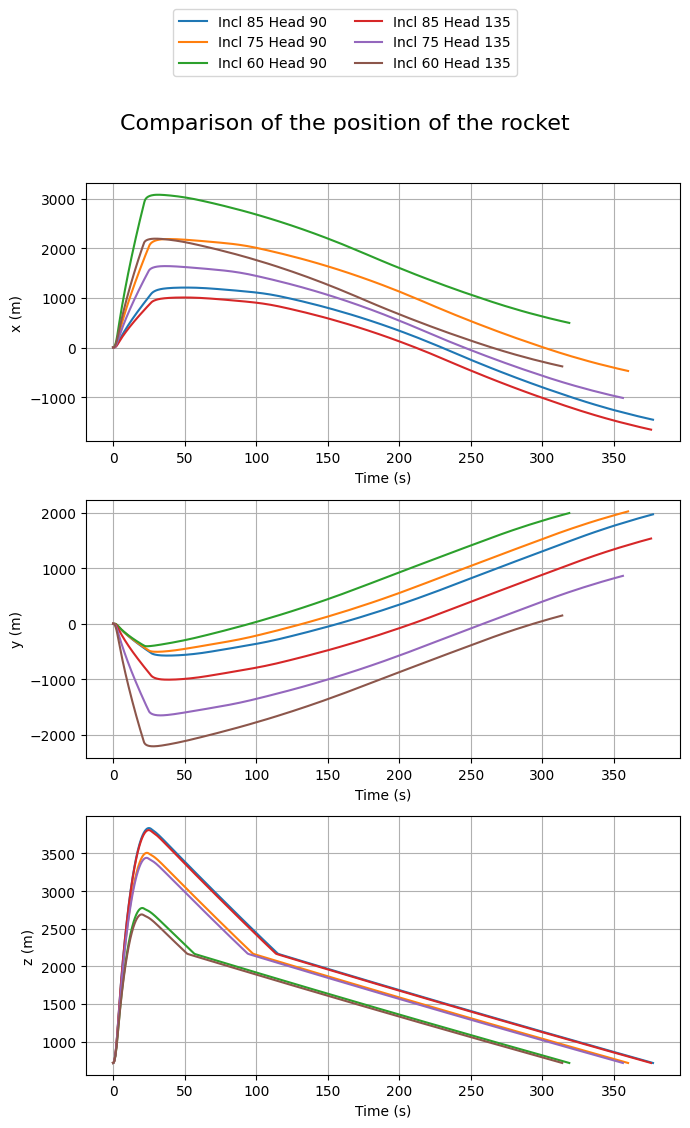

In [9]:
comparison.positions()


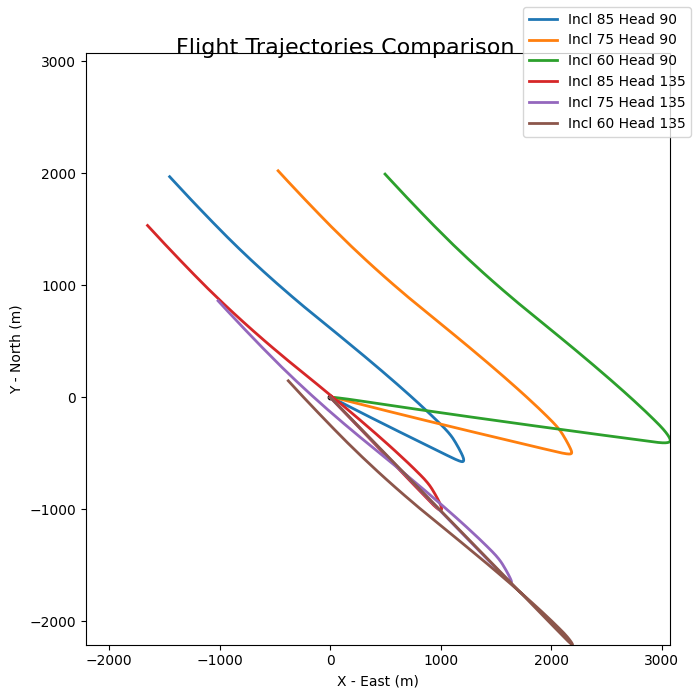

In [10]:
comparison.trajectories_2d(plane= 'xy', legend=True)

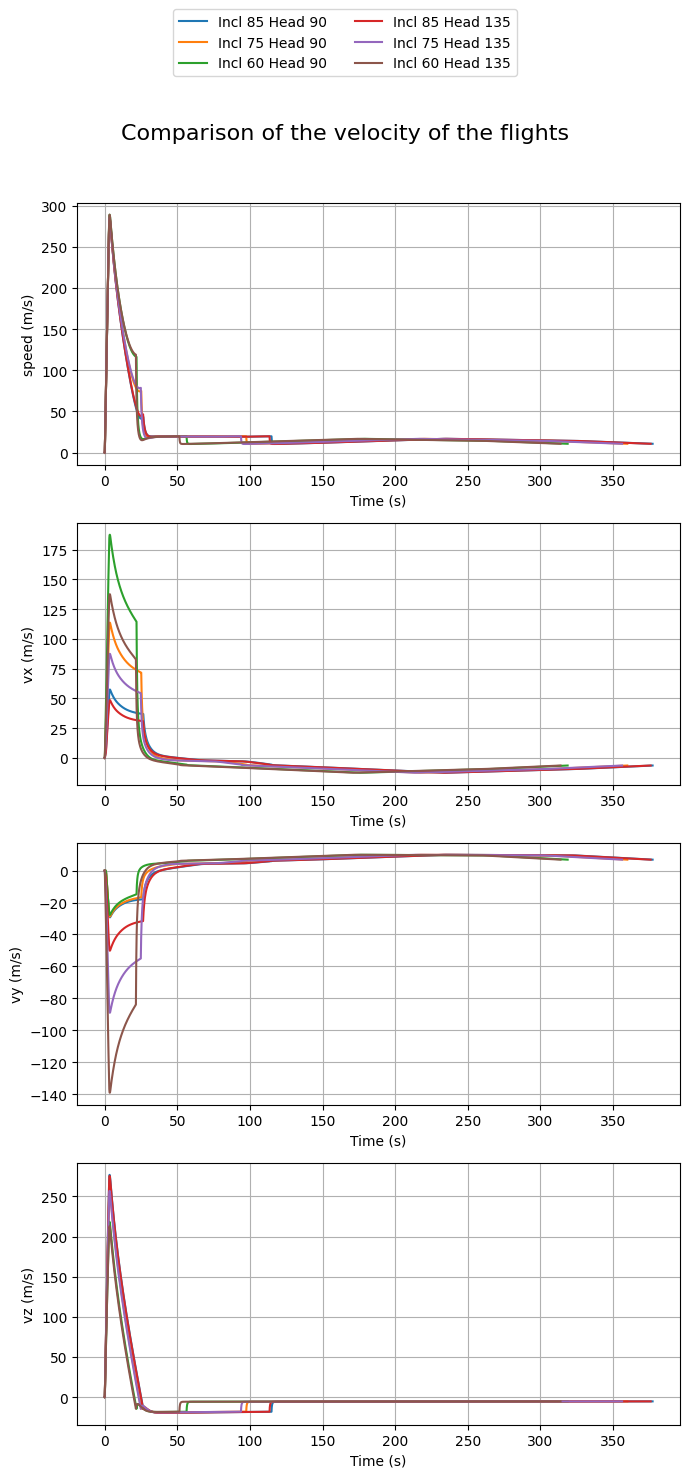

In [11]:
comparison.velocities()


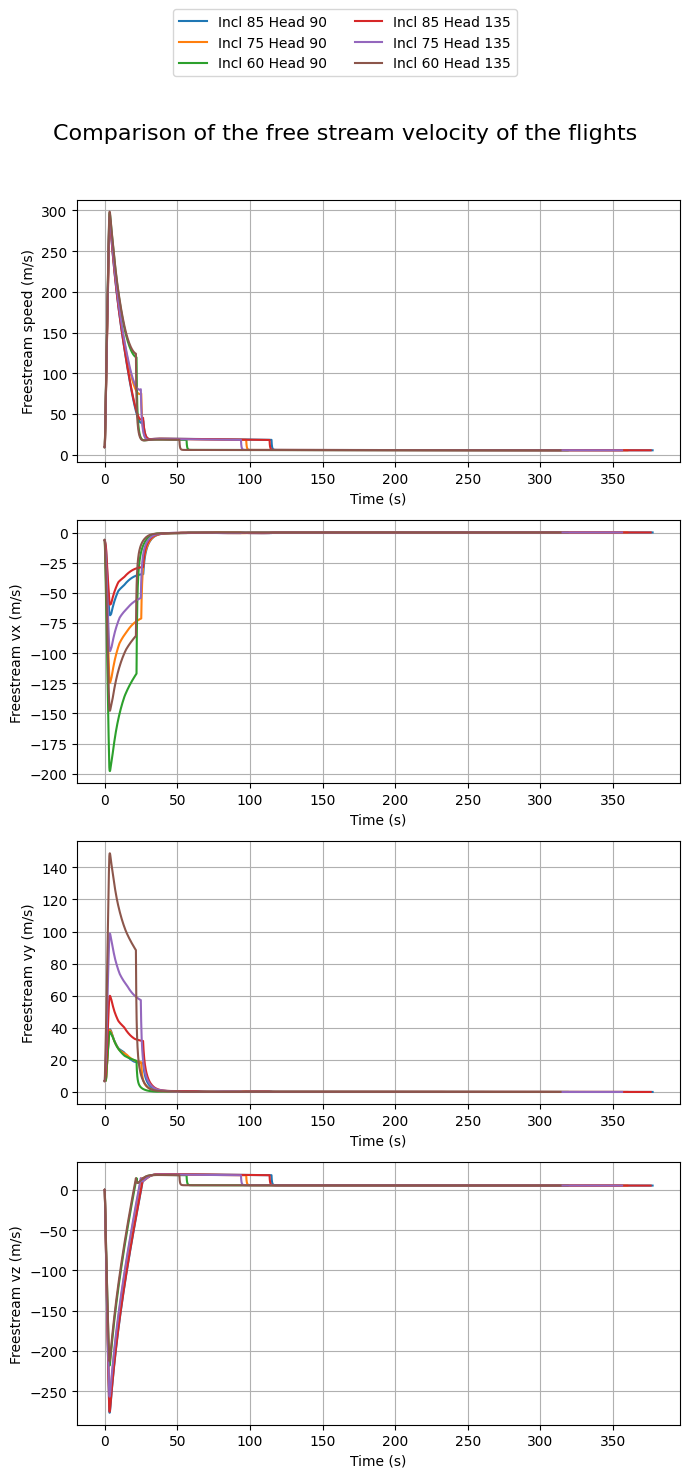

In [12]:
comparison.stream_velocities()


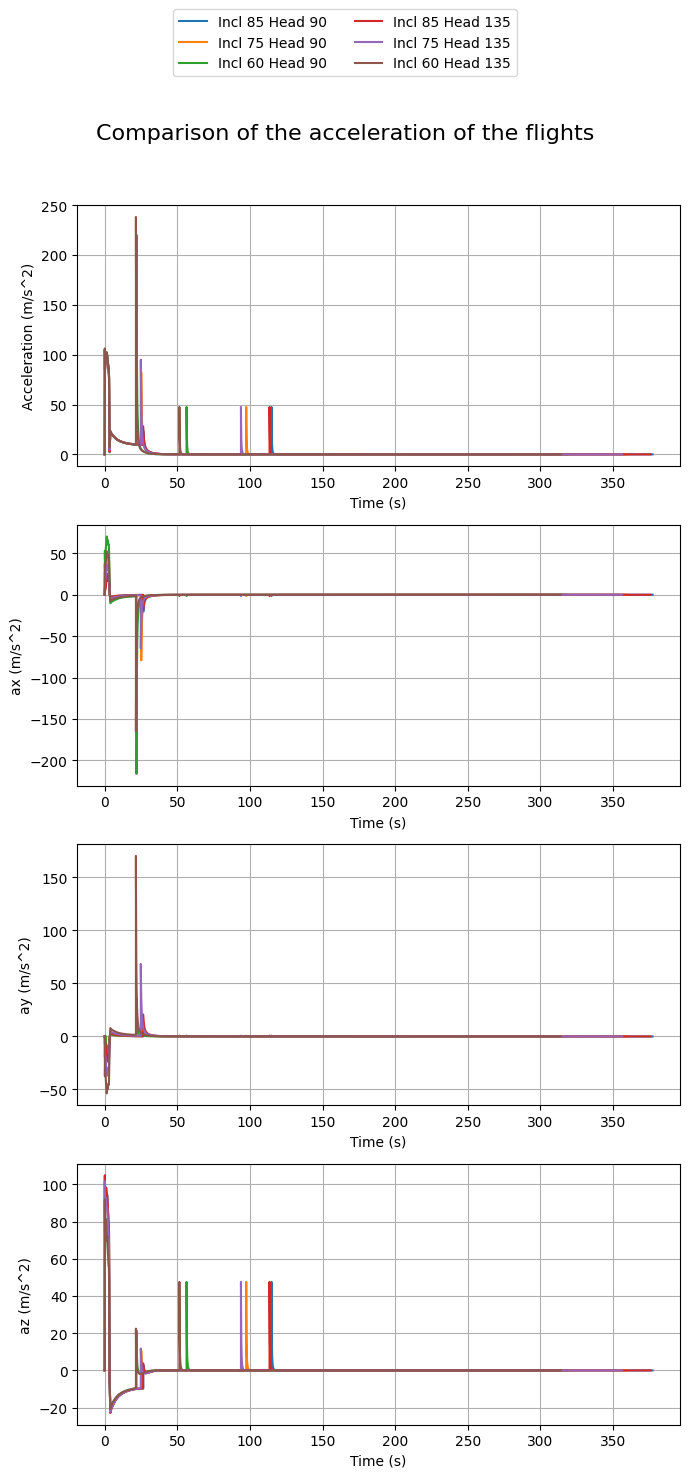

In [13]:
comparison.accelerations()


### Angular kinematics

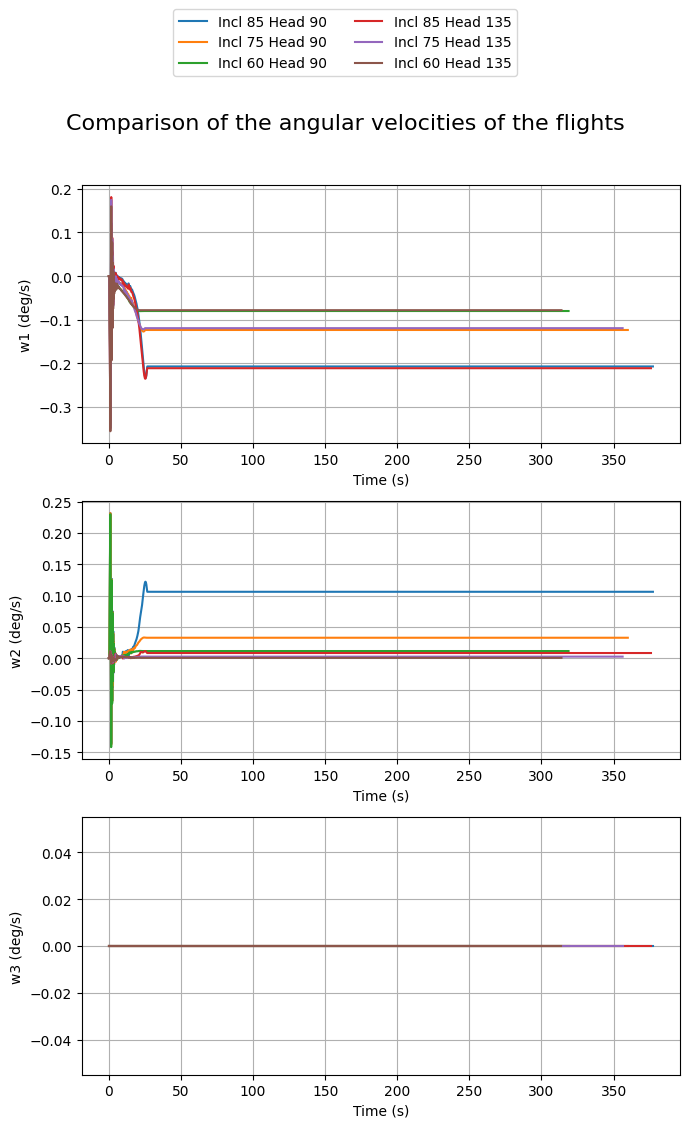

In [14]:
comparison.angular_velocities()


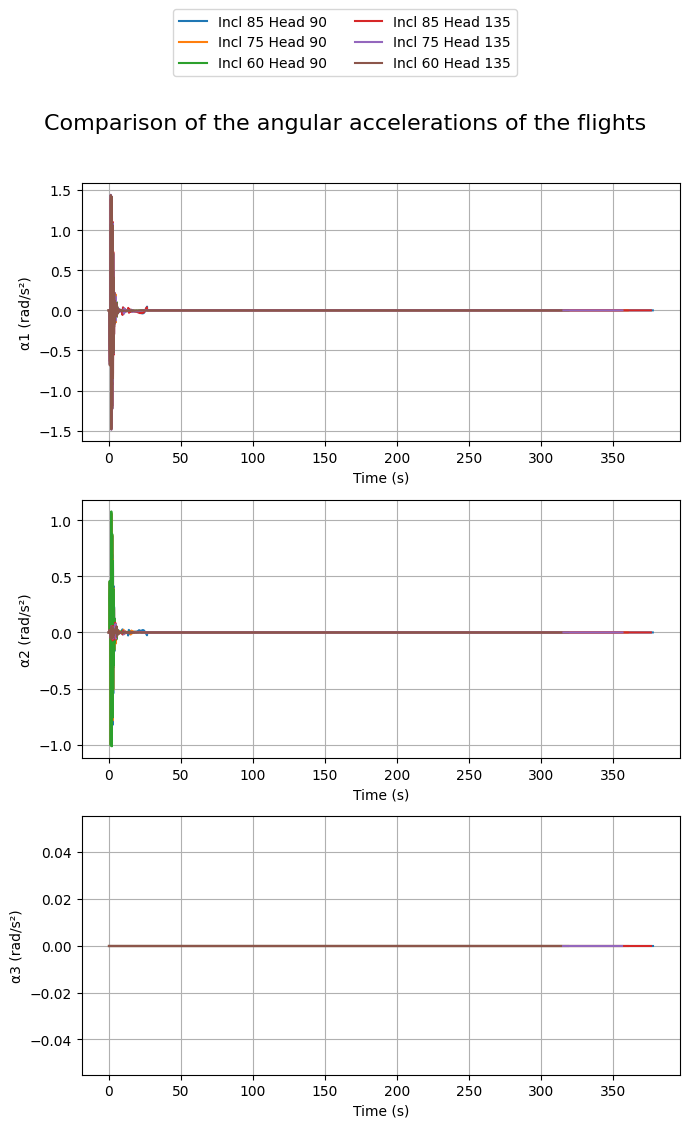

In [15]:
comparison.angular_accelerations()


### Attitudes

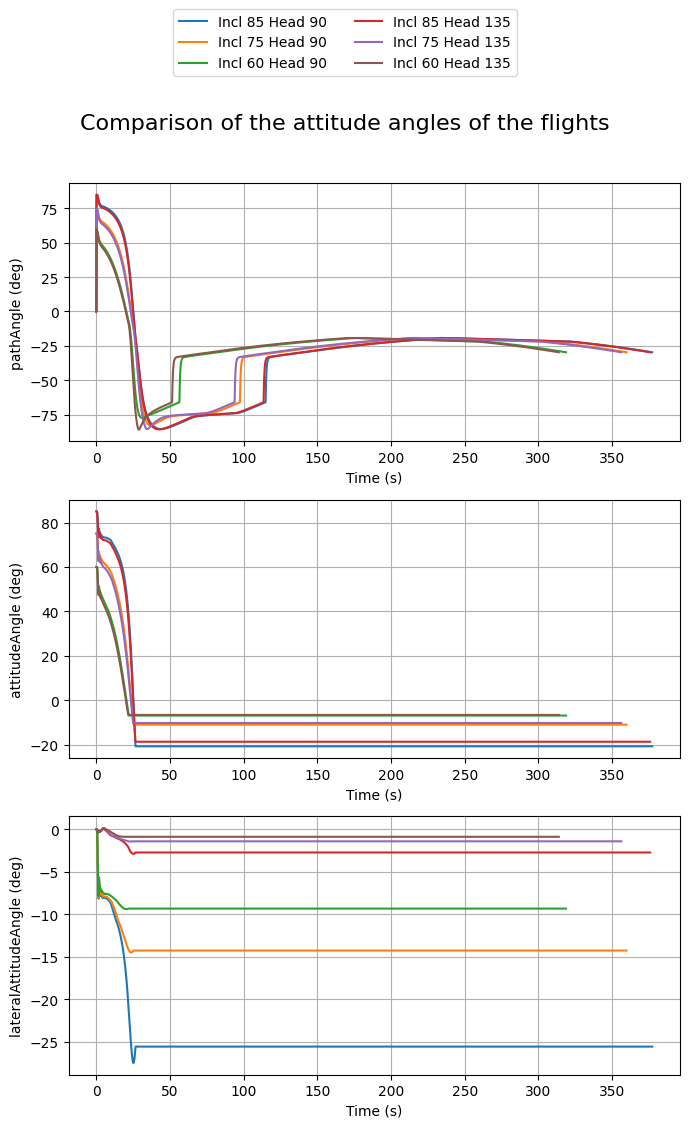

In [16]:
comparison.attitude_angles()


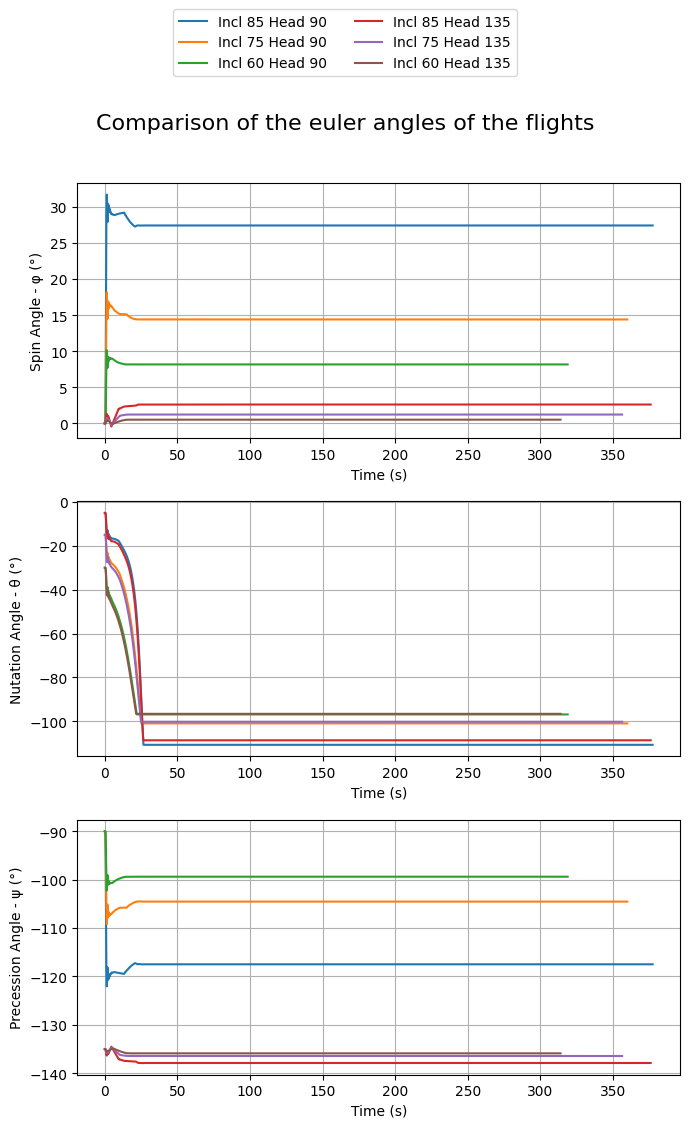

In [17]:
comparison.euler_angles()


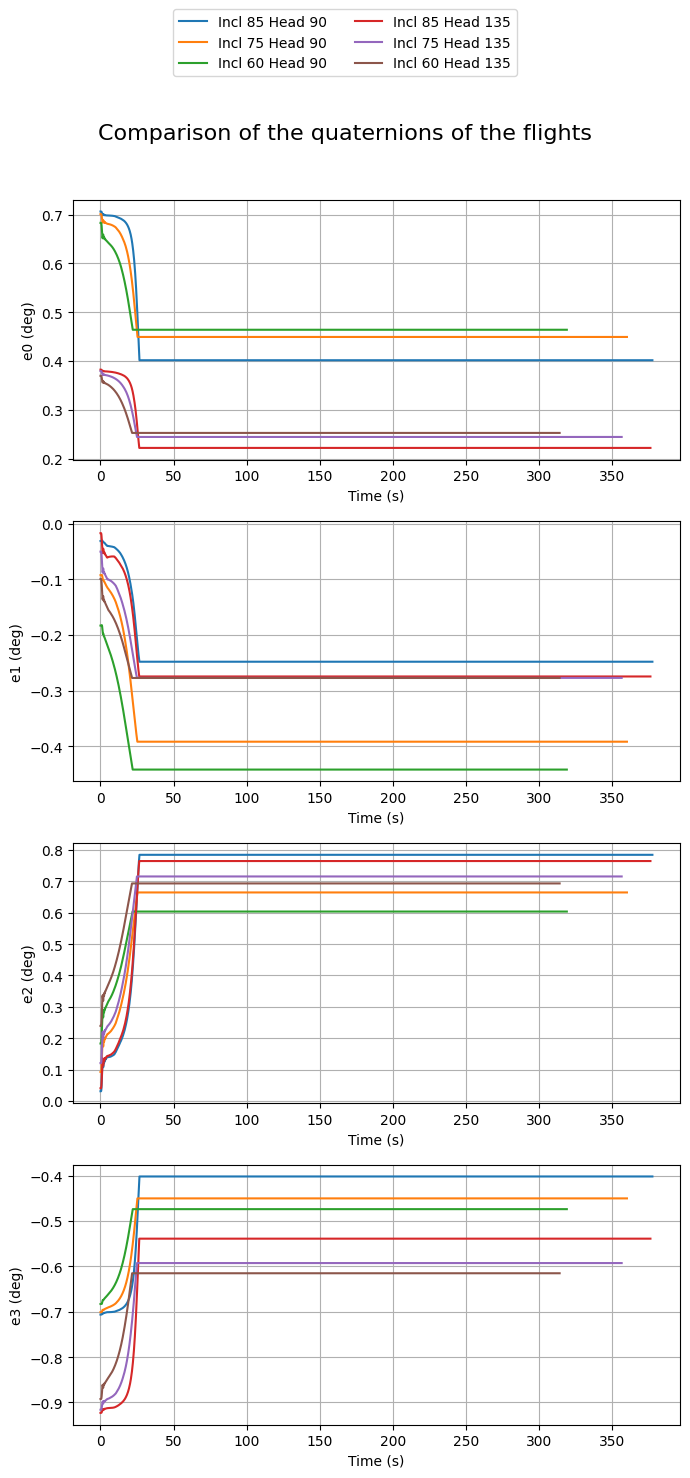

In [18]:
comparison.quaternions()


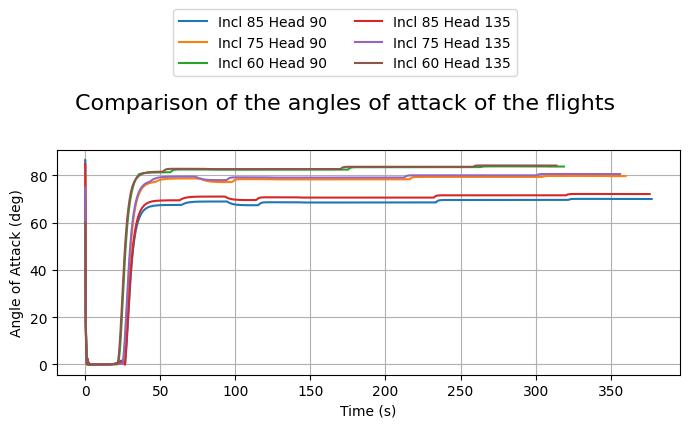

In [19]:
comparison.angles_of_attack()


### Forces and Moments

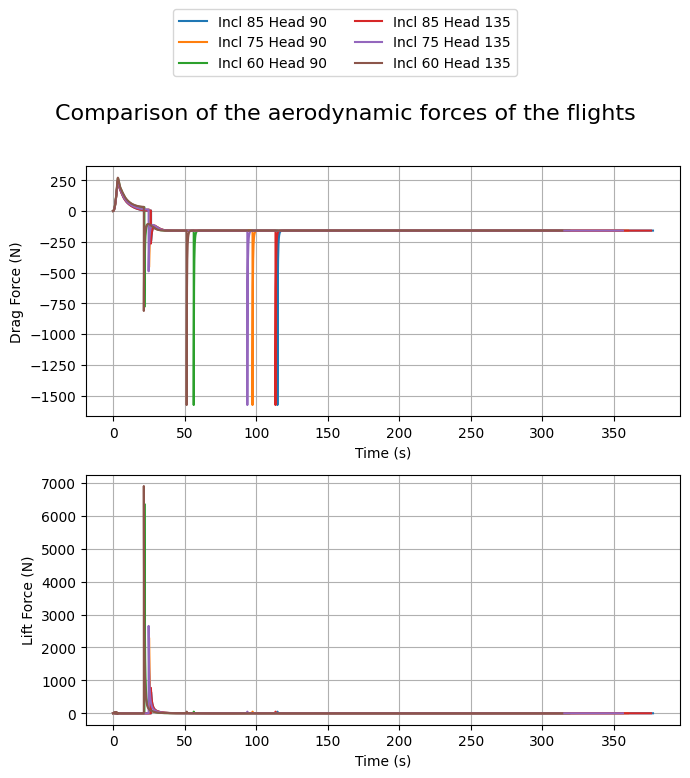

In [20]:
comparison.aerodynamic_forces()


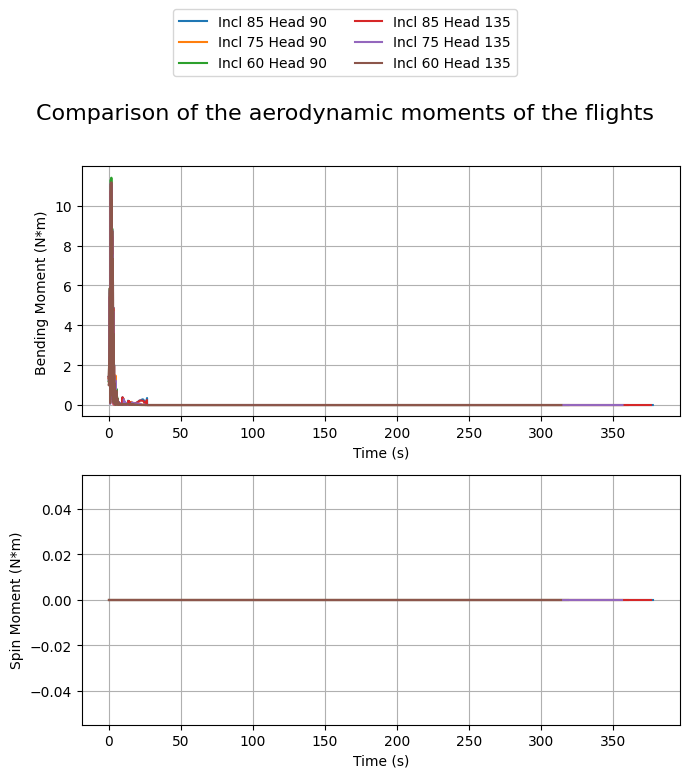

In [21]:
comparison.aerodynamic_moments()


In [22]:
# comparison.rail_buttons_forces() # Currently not working!


### Energies and Power

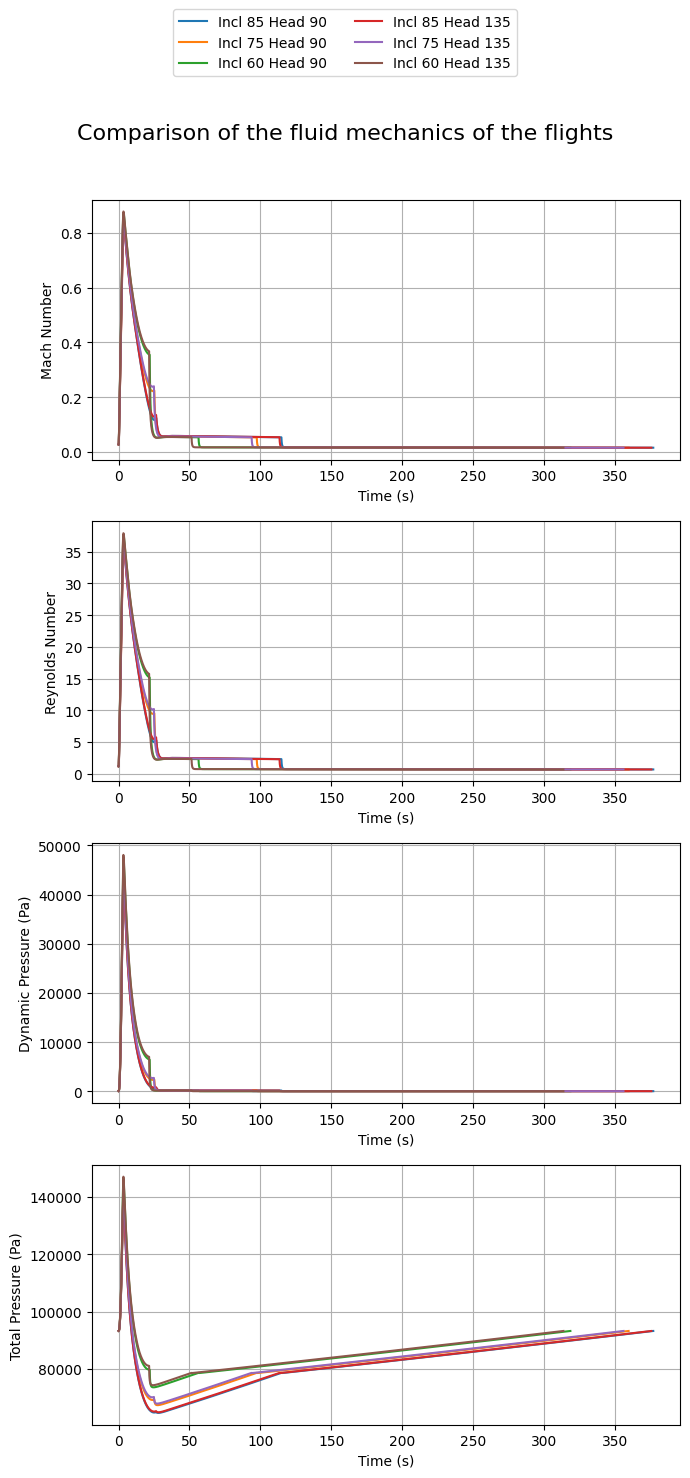

In [23]:
comparison.fluid_mechanics()


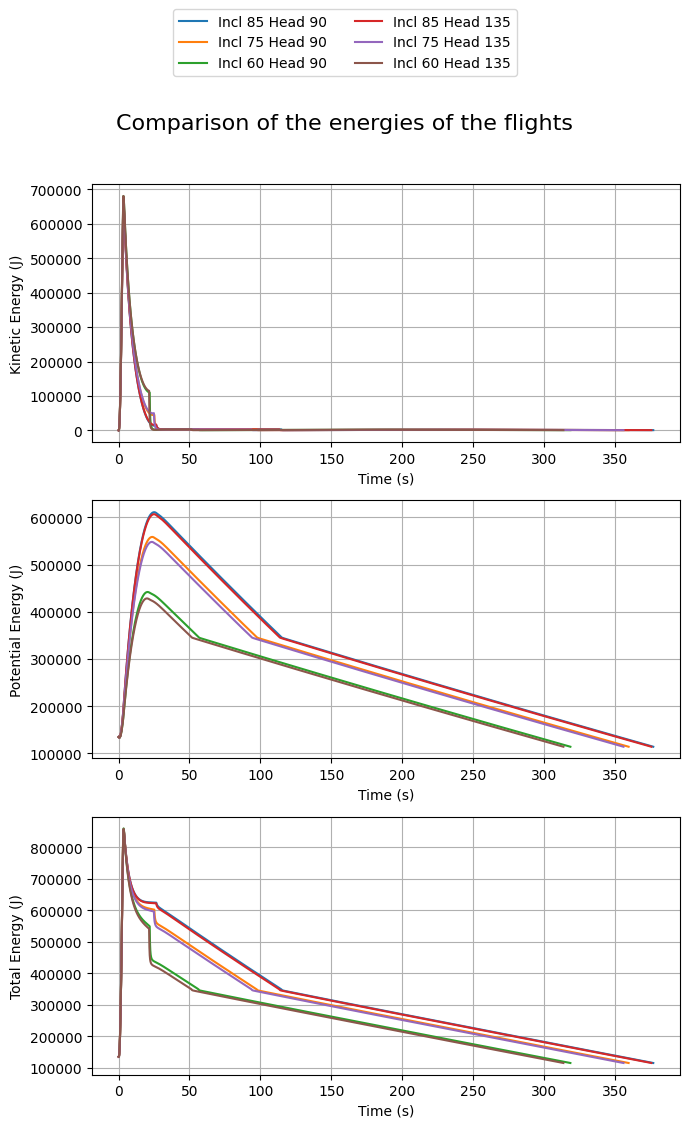

In [24]:
comparison.energies()


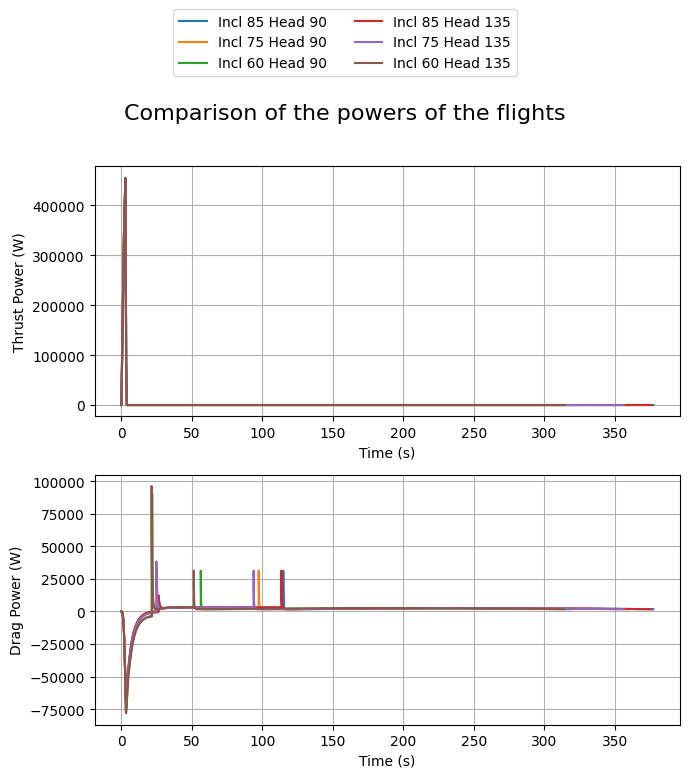

In [25]:
comparison.powers()


## Plotting everything together

Alternatively, we can plot all the results together by calling one simple 
method:

In [26]:
# comparison.all()
